In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df.head()
route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15"]]
route_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15
0,DL,Minneapolis-Saint Paul International Airport,Denver International Airport,0.0,0.0,-16.0,0.0
1,DL,Minneapolis-Saint Paul International Airport,Detroit Metropolitan Airport,1.0,0.0,-8.0,0.0
2,DL,Detroit Metropolitan Airport,Minneapolis-Saint Paul International Airport,-4.0,0.0,-18.0,0.0
3,DL,Minneapolis-Saint Paul International Airport,LaGuardia Airport (Marine Air Terminal),-3.0,0.0,-31.0,0.0
4,DL,Denver International Airport,Minneapolis-Saint Paul International Airport,0.0,0.0,9.0,0.0


In [49]:
route_outbound_delays_df = route_df.loc[route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
route_outbound_delays_df = route_outbound_delays_df.groupby(["DEST_AIRPORT"])["DEP_DEL15", "ARR_DEL15"].count()
route_outbound_delays_df.head()
most_outbound_delays_df = route_outbound_delays_df.loc[route_outbound_delays_df["DEP_DEL15"] >= 7000]
most_outbound_delays_df

,DEP_DEL15,ARR_DEL15
DEST_AIRPORT,,
Chicago O'Hare International Airport,7535,7520


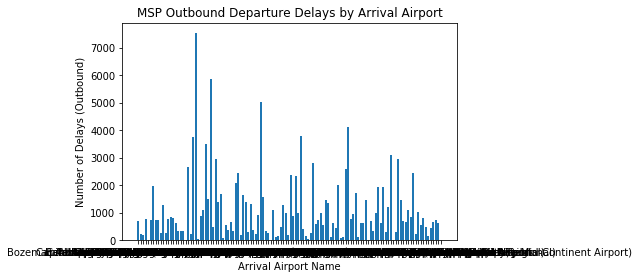

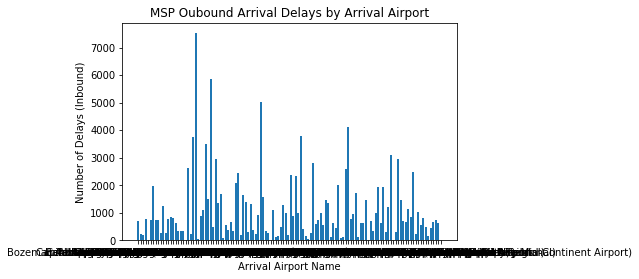

In [61]:
plt.bar(route_outbound_delays_df.index, route_outbound_delays_df["DEP_DEL15"])
plt.ylabel("Number of Delays (Outbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Outbound Departure Delays by Arrival Airport")
plt.show()
plt.bar(route_outbound_delays_df.index, route_outbound_delays_df["ARR_DEL15"])
plt.ylabel("Number of Delays (Inbound)")
plt.xlabel("Arrival Airport Name")
plt.title("MSP Oubound Arrival Delays by Arrival Airport")
plt.show()

In [54]:
msp_inbound_delays_df = route_df.loc[route_df["DEST_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
msp_inbound_delays_df = msp_inbound_delays_df.groupby(["ORIGIN_AIRPORT"])["DEP_DEL15", "ARR_DEL15"].count()
msp_inbound_delays_df.head()
most_inbound_delays_df = msp_inbound_delays_df.loc[msp_inbound_delays_df["DEP_DEL15"] >= 7000]
most_inbound_delays_df

,DEP_DEL15,ARR_DEL15
ORIGIN_AIRPORT,,
Chicago O'Hare International Airport,7681,7669


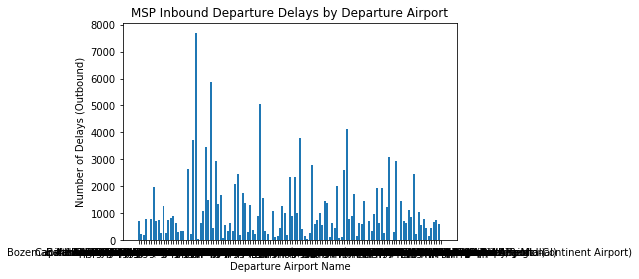

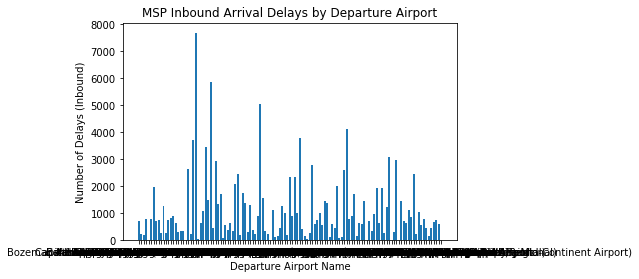

In [62]:
plt.bar(msp_inbound_delays_df.index, msp_inbound_delays_df["DEP_DEL15"])
plt.ylabel("Number of Delays (Outbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Departure Delays by Departure Airport")
plt.show()
plt.bar(msp_inbound_delays_df.index, msp_inbound_delays_df["ARR_DEL15"])
plt.ylabel("Number of Delays (Inbound)")
plt.xlabel("Departure Airport Name")
plt.title("MSP Inbound Arrival Delays by Departure Airport")
plt.show()

In [57]:
new_route_df = df[["OP_UNIQUE_CARRIER","ORIGIN_AIRPORT","DEST_AIRPORT","DEP_DELAY","DEP_DEL15","ARR_DELAY","ARR_DEL15", "CRS_ARR_TIME", "ARR_TIME"]]
new_route_df.head()
sched_vs_act_arrival_df = new_route_df.loc[new_route_df["ORIGIN_AIRPORT"] == "Minneapolis-Saint Paul International Airport", :]
sched_vs_act_arrival_df = sched_vs_act_arrival_df.loc[sched_vs_act_arrival_df["DEP_DEL15"] == 1, :]
sched_vs_act_arrival_df.head()

,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_DELAY,DEP_DEL15,ARR_DELAY,ARR_DEL15,CRS_ARR_TIME,ARR_TIME
34,DL,Minneapolis-Saint Paul International Airport,Salt Lake City International Airport,129.0,1.0,104.0,1.0,1625,1809.0
37,DL,Minneapolis-Saint Paul International Airport,Detroit Metropolitan Airport,25.0,1.0,-3.0,0.0,2301,2258.0
62,DL,Minneapolis-Saint Paul International Airport,Orlando International Airport,18.0,1.0,15.0,1.0,30,45.0
71,DL,Minneapolis-Saint Paul International Airport,San Francisco International Airport,100.0,1.0,71.0,1.0,1407,1518.0
74,DL,Minneapolis-Saint Paul International Airport,San Diego International Airport (Lindbergh Field),31.0,1.0,0.0,0.0,1615,1615.0


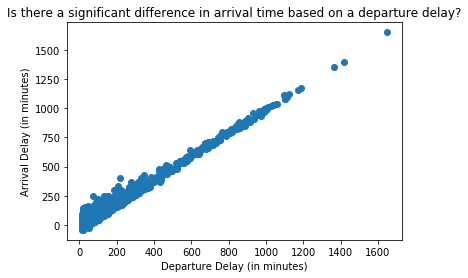

In [59]:
plt.scatter(sched_vs_act_arrival_df["DEP_DELAY"], sched_vs_act_arrival_df["ARR_DELAY"])
plt.ylabel("Arrival Delay (in minutes)")
plt.xlabel("Departure Delay (in minutes)")
plt.title("Is there a significant difference in arrival time based on a departure delay?")
plt.show()